In [ ]:
from google.colab import drive 
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import tensorflow
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/drive/MyDrive/Folds.csv")
df = df.sample(frac=1)
path = "/content/drive/MyDrive/"
 

In [ ]:
train_image = []
y = []

for i in tqdm(range(df.shape[0])):
    img = image.load_img(path + df['filename'].iloc[i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
    if (df['filename'].iloc[i].find('benign') != -1): 
        y.append(0) 
    else:
        y.append(1)
        
X = np.array(train_image)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)
Y_val = np_utils.to_categorical(y_val, 2)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 39545/39545 [52:41<00:00, 12.51it/s]


(31636, 28, 28, 3)
(6327, 28, 28, 3)
(1582, 28, 28, 3)


In [ ]:
print(sum(y==0))
print(sum(y==1))
print(sum(y==0) + sum(y==1) )
print(X.shape)

12400
27145
39545
(39545, 28, 28, 3)


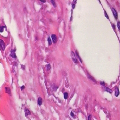

In [ ]:
i=1 #benign
image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)
image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)
image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)
    

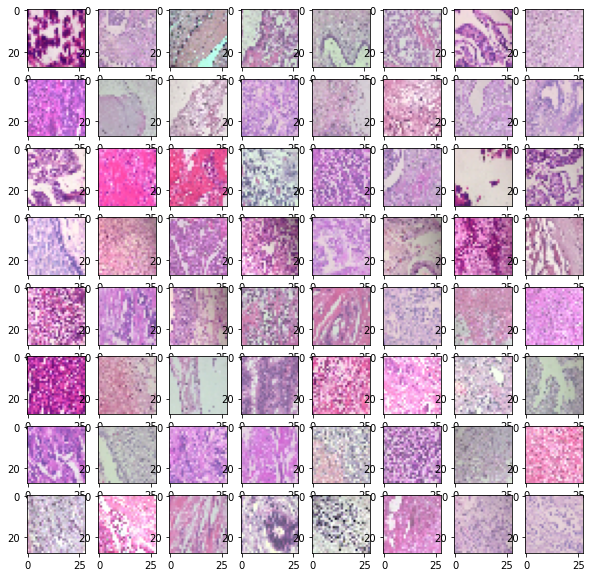

In [ ]:
fig=plt.figure(figsize=(10,10))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i])
plt.show()

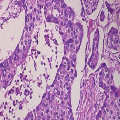

In [ ]:
i=2 #malignant
image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)
    

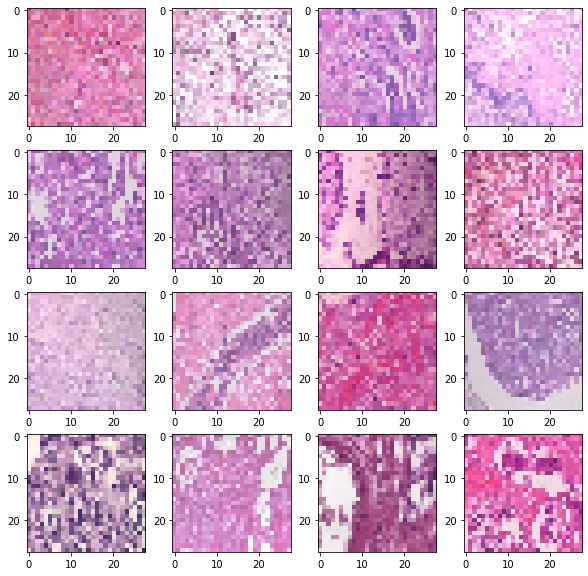

In [ ]:
fig=plt.figure(figsize=(10,10))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
plt.show()

In [ ]:
model = Sequential()
#convlouton layer with the number of filters, filter size, strides steps, padding or no, activation type and the input shape.
model.add(Conv2D(30, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,3)))
#pooling layer to reduce the volume of input image after convolution,
model.add(MaxPool2D(pool_size=(1,1)))
#flatten layer to flatten the output
model.add(Flatten())   # flatten output of conv
model.add(Dense(250, activation='relu'))  # hidden layer of 250 neuron
model.add(Dense(200, activation='relu'))  # hidden layer of 200 neuron
model.add(Dense(150, activation='relu'))  # hidden layer of 150 neuron

model.add(Dense(2, activation='sigmoid'))  # output layer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=128, epochs = 5, validation_data=(X_test, Y_test))


Epoch 1/5
248/248 [==============================] - 45s 10ms/step - loss: 0.5375 - accuracy: 0.7781 - val_loss: 0.3666 - val_accuracy: 0.8453
Epoch 2/5
248/248 [==============================] - 2s 6ms/step - loss: 0.3267 - accuracy: 0.8681 - val_loss: 0.2079 - val_accuracy: 0.9196
Epoch 3/5
248/248 [==============================] - 2s 7ms/step - loss: 0.1528 - accuracy: 0.9418 - val_loss: 0.0719 - val_accuracy: 0.9742
Epoch 4/5
248/248 [==============================] - 2s 6ms/step - loss: 0.0329 - accuracy: 0.9901 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 5/5
248/248 [==============================] - 2s 7ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0426 - val_accuracy: 0.9880


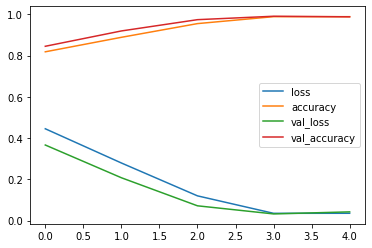

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
base_model = InceptionV3(input_shape=(100,100,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# for layer in base_model.layers:
   layer.trainable = True

base_model.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy test :  98.35651074589128


In [ ]:
y_pred=model.predict_classes(X_test)

target=["0","1"]
from sklearn import metrics


print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),5))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,y_pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),5))
print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test, y_pred,multi_class='ovo', average='weighted'),5))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),5))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred,target_names=target))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.98799
Precision: 0.98807
Recall: 0.98799
F1 Score: 0.98801
ROC AUC Score: 0.98789
Cohen Kappa Score: 0.97245
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2019
           1       0.99      0.99      0.99      4308

    accuracy                           0.99      6327
   macro avg       0.98      0.99      0.99      6327
weighted avg       0.99      0.99      0.99      6327



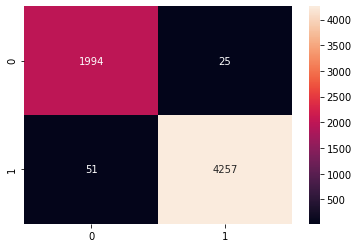

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm,annot=True,fmt='d')
